## Inference and data analysis

In [1]:
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/Consumer_Complaints.csv',
                   low_memory = False, parse_dates=[8,9])

In [3]:
df = data.groupby(['Date received', 'Product']).size()
df = df.unstack()
ratios = df['Mortgage'] / df['Credit card']

In [4]:
ratios.describe()

count    1677.000000
mean        2.713272
std         1.207159
min         0.133333
25%         1.893333
50%         2.604651
75%         3.306122
max        12.000000
dtype: float64

## Estimation of parameters

### Frequentist approach

In [5]:
from scipy.stats import sem # Standard Error
print("The estimated value of the parameter mu is {} with standard error {}"
      .format(ratios.mean(), sem(ratios.dropna())))

The estimated value of the parameter mu is 2.7132719271258874 with standard error 0.029477983452365988


### Bayesian approach

In [6]:
import pymc as pm

In [8]:
mu = pm.Uniform('mu', lower = ratios.min(), upper=ratios.max())
sigma = 1.2
observation = pm.Normal('obs', mu=mu, tau = 1./sigma**2,
                        value=ratios.dropna(), observed=True)
model = pm.Model([observation, mu])

In [14]:
# Markov Chain Monte Carlo

In [10]:
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000, 1)

 [-----------------100%-----------------] 40000 of 40000 complete in 3.9 sec

In [11]:
mcmc.stats()

{'mu': {'95% HPD interval': array([ 2.65690149,  2.77274209]),
  'mc error': 0.00039973913153046759,
  'mean': 2.7136505615700659,
  'n': 30000,
  'quantiles': {2.5: 2.6557208056011352,
   25: 2.6943756576925222,
   50: 2.7136811716266434,
   75: 2.7333163088345884,
   97.5: 2.7717634328103373},
  'standard deviation': 0.029147629374982269}}

In [12]:
mcmc.summary()


mu:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	2.714            0.029            0.0              [ 2.657  2.773]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	2.656            2.694           2.714          2.733         2.772
	


Plotting mu


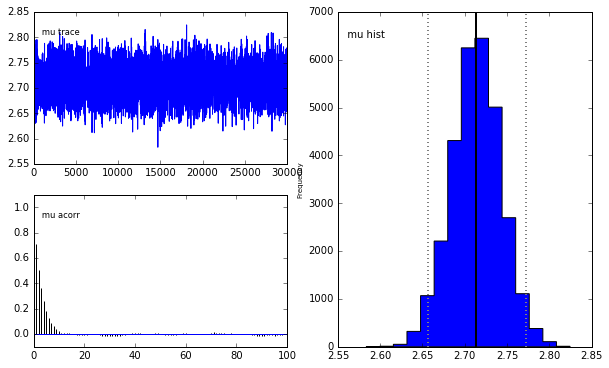

In [13]:
from pymc.Matplot import plot as mcplot
mcplot(mcmc)

### Likelihood approach

In [15]:
from scipy.stats import norm as NormalDistribution

In [16]:
NormalDistribution.fit(ratios.dropna(), fscale=1.3)

(2.7132719271258874, 1.3)

## Interval Estimation

### Frequentist approach